In [6]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import pdb
import pandas as pd
import os
import git

np.random.seed(19680801)
git_repo = git.Repo(".", search_parent_directories=True)
git_root = git_repo.git.rev_parse("--show-toplevel")

In [7]:
def heatmap(data, row_labels, col_labels, spine=True, ax=None, cbar_kw=None, cbarlabel="", shrink=0.7, **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
        data (numpy.array): A 2D numpy array of shape (M, N)
        row_labels: A list or array of length M with the labels for the rows.
        col_labels: A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """
    tickparams = {
        "top": False,
        "right": False,
        "left": False,
        "bottom": False,
        "labeltop": False,
        "labelright": False,
        "labelleft": False,
        "labelbottom": False,
    }

    ax = plt.gca() if ax is None else ax
    cbar_kw = {} if cbar_kw is None else cbar_kw

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw, shrink=shrink)

    # Show all ticks and label them with the respective list entries.
    if row_labels is not None:
        tickparams["labelbottom"] = True
        ax.set_xticks(np.arange(data.shape[1]), labels=row_labels)
    
    if col_labels is not None:
        tickparams["labelleft"] = True
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")   
        ax.set_yticks(np.arange(data.shape[0]), labels=col_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(**tickparams)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(spine)

    return im, cbar

In [8]:
# Read in all the data

encode_supp = pd.read_csv(os.path.join(git_root, "output", "encode_supp_percent_by_region.csv"), index_col=0)
encode_filtered = pd.read_csv(os.path.join(git_root, "output", "encode_percent_by_region.csv"), index_col=0)
encode_filtered_downsampled = pd.read_csv(os.path.join(git_root, "output", "encode_downsampled_percent_by_region.csv"), index_col=0)
spidr = pd.read_csv(os.path.join(git_root, "output", "spidr_percent_by_region.csv"), index_col=0)

# All columns and indices should be the same so choosing from spidr is arbitrary
rbps = spidr.columns.tolist()
region_types = spidr.index.tolist()

spidr_data = spidr.to_numpy()
encode_filtered_data = encode_filtered.to_numpy()
encode_filtered_downsampled_data = encode_filtered_downsampled.to_numpy()
encode_supp_data = encode_supp.to_numpy()

assert spidr_data.shape[0] == encode_filtered_data.shape[0] == encode_filtered_downsampled_data.shape[0] == encode_supp_data.shape[0]
assert spidr_data.shape[1] == encode_filtered_data.shape[1] == encode_filtered_downsampled_data.shape[1] == encode_supp_data.shape[1]

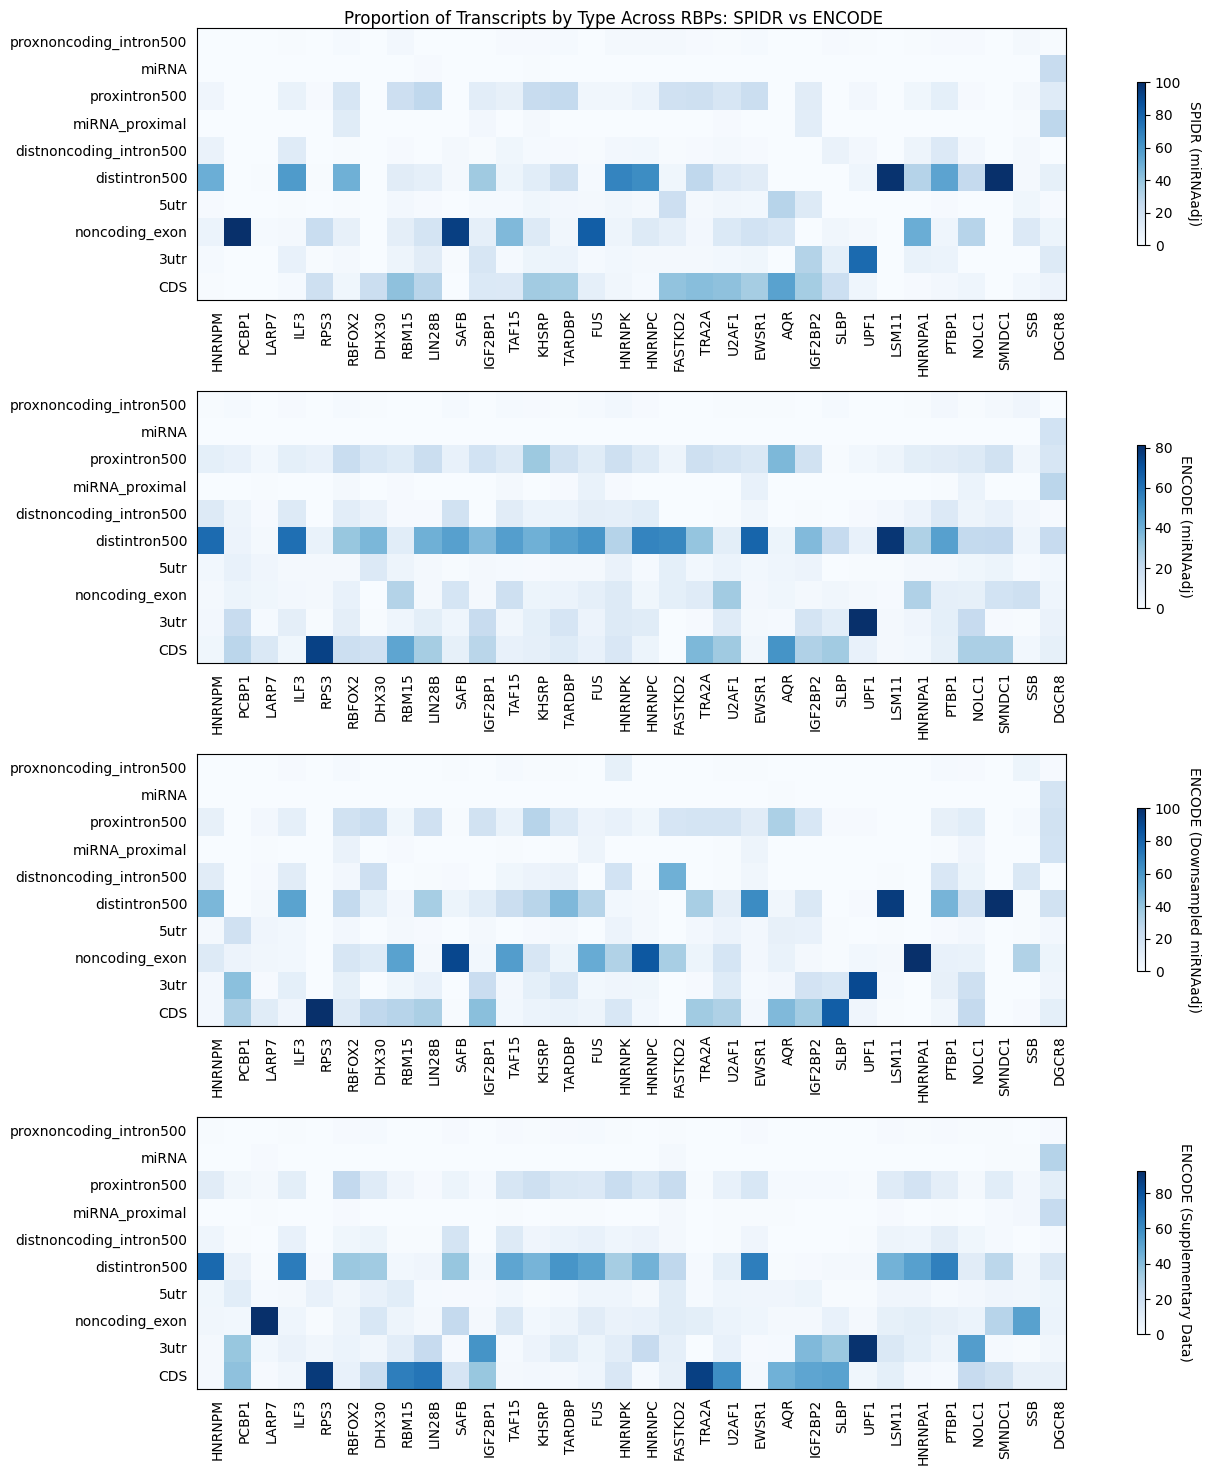

In [9]:
annotator_labeling_fig, ax = plt.subplots(4, 1, figsize=(15, 15), sharex=True, sharey=True)
kwargs = {
    'row_labels': rbps,
    'col_labels': region_types,
    'cmap': "Blues",
    'shrink': 0.6
}

heatmap(data=spidr_data, ax=ax[0], cbarlabel="SPIDR (miRNAadj)", **kwargs)
heatmap(data=encode_filtered, ax=ax[1], cbarlabel="ENCODE (miRNAadj)", **kwargs)
heatmap(data=encode_filtered_downsampled, ax=ax[2], cbarlabel="ENCODE (Downsampled miRNAadj)", **kwargs)
heatmap(data=encode_supp, ax=ax[3], cbarlabel="ENCODE (Supplementary Data)", **kwargs)

annotator_labeling_fig.suptitle("Proportion of Transcripts by Type Across RBPs: SPIDR vs ENCODE")
annotator_labeling_fig.tight_layout()

In [10]:
annotator_labeling_fig.savefig(os.path.join(git_root, "figures", "heatmap_spidr_vs_encode_miRNAadj.png"))